# Decision Tree Project Tutorial

## Predicting Diabetes:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Data Dictionary:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1), Class Distribution: (class value 1 is interpreted as "tested positive for diabetes")

## Import Libraries

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Read Data and basic info

In [2]:
# Example importing the CSV here

df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv', sep=",")


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#not nulls

df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#BloodPressure, SkinThickness, Glucose,  Insulin not be 0

In [6]:
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
364,4,147,74,25,293,34.9,0.385,30,0
297,0,126,84,29,215,30.7,0.520,24,0
417,4,144,82,32,0,38.5,0.554,37,1
279,2,108,62,10,278,25.3,0.881,22,0
158,2,88,74,19,53,29.0,0.229,22,0
572,3,111,58,31,44,29.5,0.430,22,0
93,4,134,72,0,0,23.8,0.277,60,1
291,0,107,62,30,74,36.6,0.757,25,1
397,0,131,66,40,0,34.3,0.196,22,1
315,2,112,68,22,94,34.1,0.315,26,0


## Check Cero values
Glucose,BloodPressure,SkinThickness,Insulin

In [7]:
## Review values
df_raw[ (df_raw['Glucose']<=0) | (df_raw['BloodPressure']<=0) | (df_raw['SkinThickness']<=0) ]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


Not drop the row, we should replace the 0 with data.
So use the mean of value, but depend of the target

In [8]:
#if value =0 and diabetic, set the mean of diabetic, else if value=0 and not diabeti, set the mean of not diabetic, 
# rest of the case use the data value

def set_value (data_value, outcome_value,mean_nodiab,mean_diab):
    if (outcome_value == 0 and data_value==0):
        return mean_nodiab
    elif (outcome_value ==1 and data_value ==0):
        return mean_diab
    else:
        return data_value

def set_use_mean (name_col):
    #calc the mean for diabetic and not diabetic that the data is not 0
    meanNoDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==0)][name_col].mean()
    meanDiab = df_raw[(df_raw[name_col]>0) & (df_raw['Outcome']==1)][name_col].mean()

    df_raw[name_col] = df_raw.apply(lambda x: set_value(x[name_col], x['Outcome'],meanNoDiab,meanDiab), axis=1)

set_use_mean('Insulin')
set_use_mean('Glucose')
set_use_mean('BloodPressure')
set_use_mean('SkinThickness')
set_use_mean('BMI')
df_raw.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.000000
mean,3.845052,121.697358,72.428141,29.247042,157.003527,32.44642,0.471876,33.240885,0.348958
std,3.369578,30.462008,12.106044,8.923908,88.860914,6.87897,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.50000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,130.287879,32.05000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,206.846154,36.60000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.10000,2.420000,81.000000,1.000000


## Study Correlation

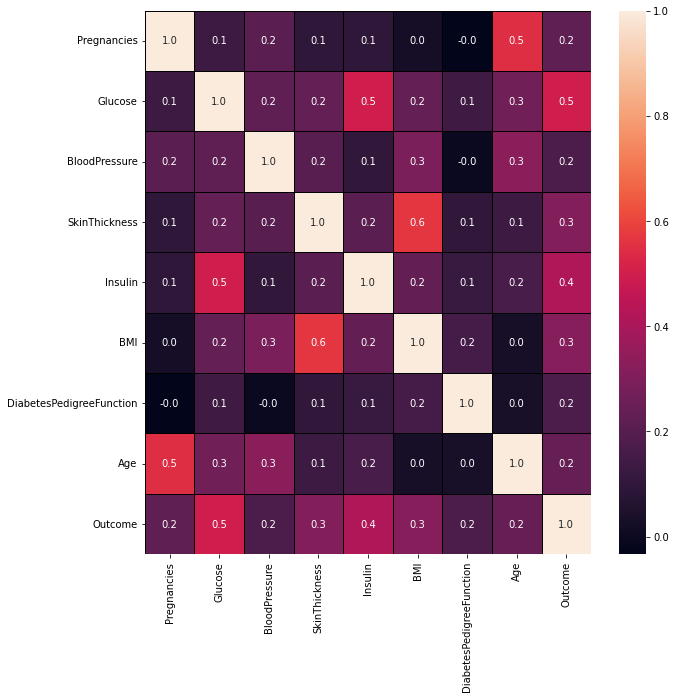

In [9]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(df_raw.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

Exist a correlation: Age-Pregnacies

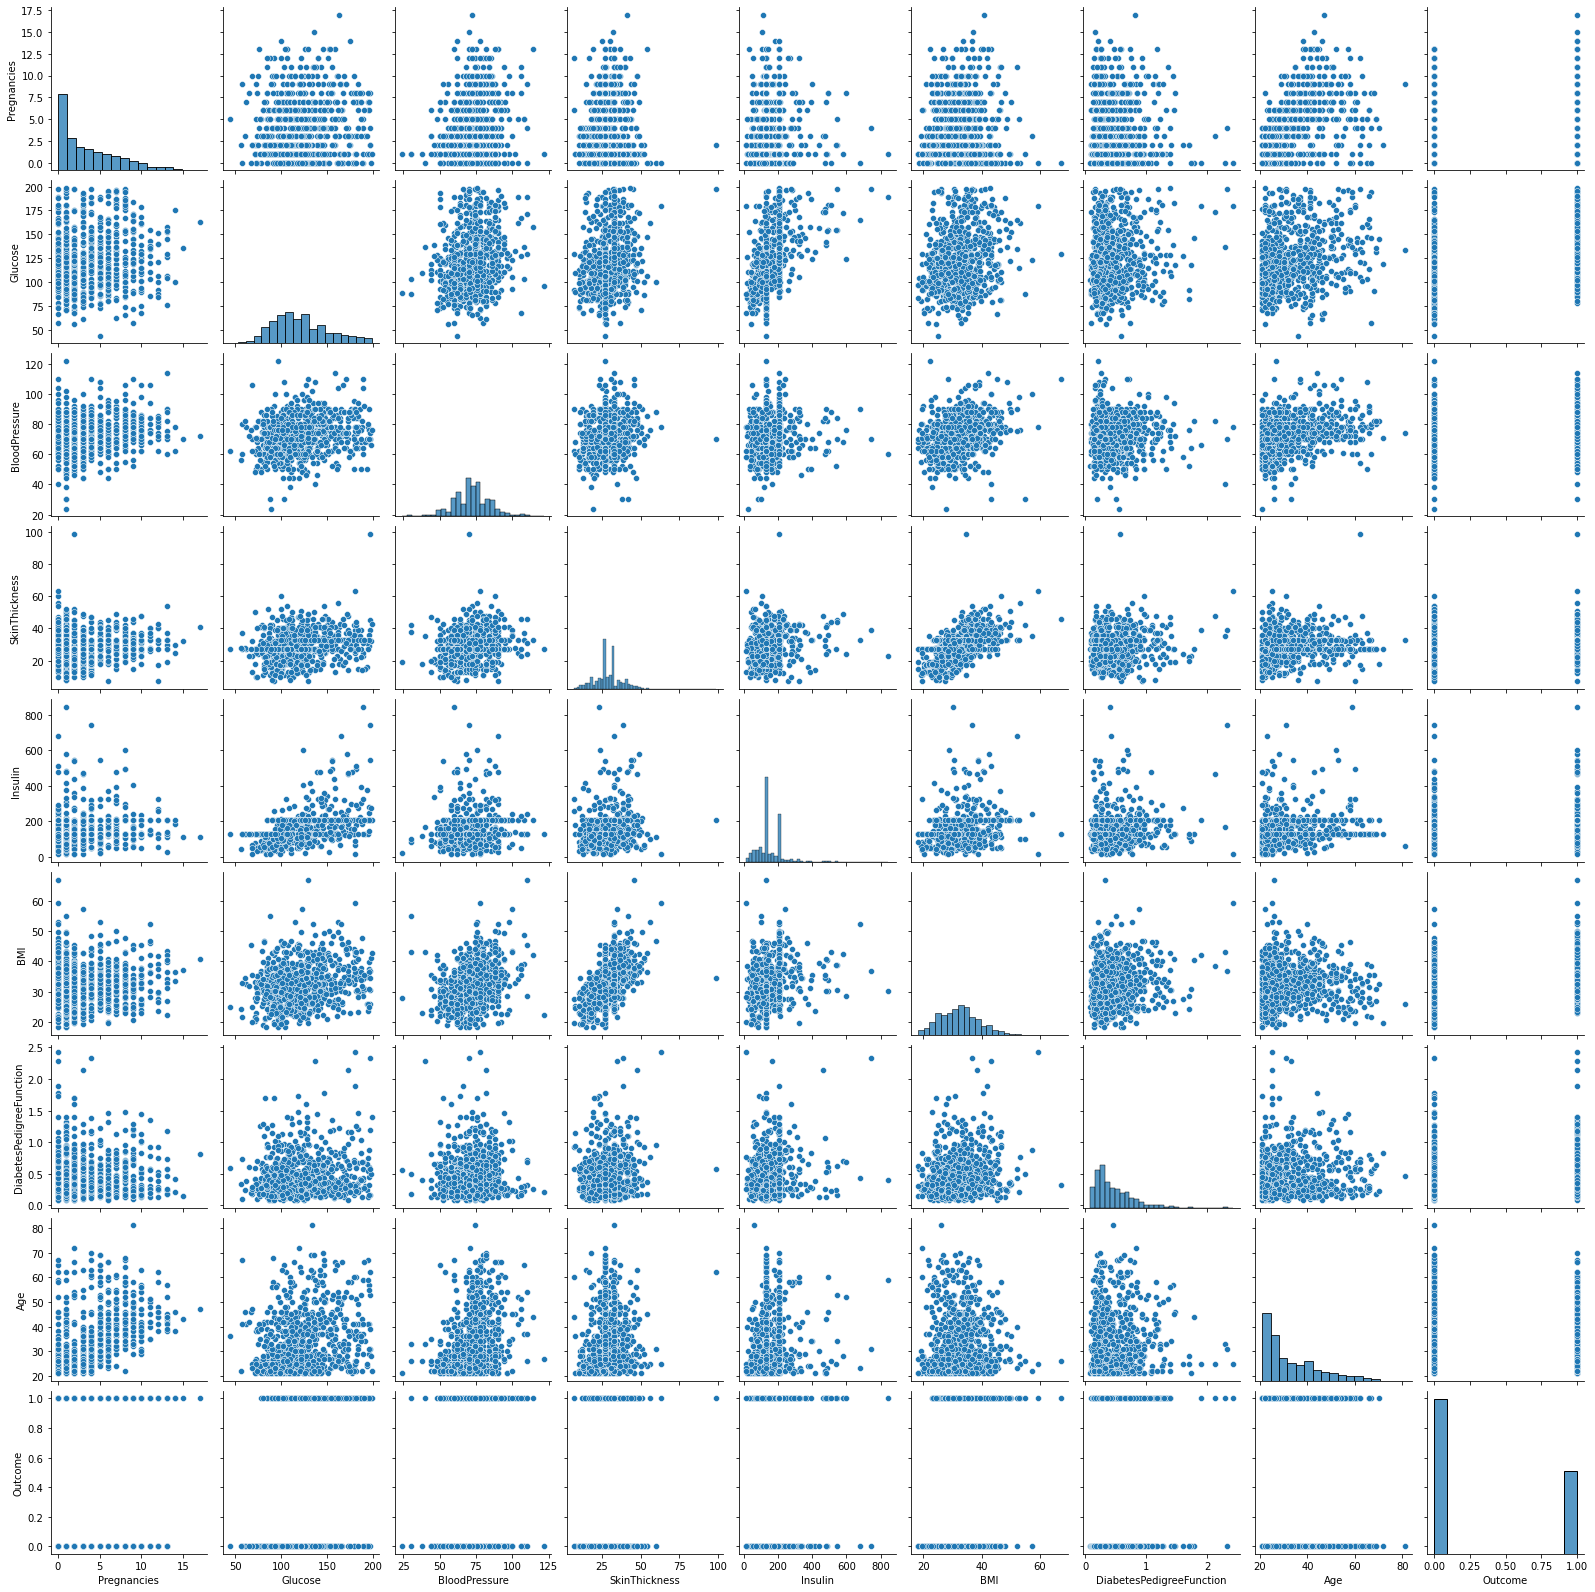

In [10]:
sns.pairplot(df_raw)

## Balanced Data?

In [11]:
df_raw["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Modelo - Decision Tree

In [29]:
 
#exclude pregnancy to feature model
X = df_raw[list(df_raw.columns[1:8])]
y = df_raw[['Outcome']]



In [30]:
#Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=34)

#### Note: 

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [43]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, max_depth=5)

clf.fit(X_train, y_train)
print('Accuracy:',clf.score(X_test, y_test))

Accuracy: 0.8541666666666666


In [32]:
#show predicted dataset
clf_pred=clf.predict(X_test)

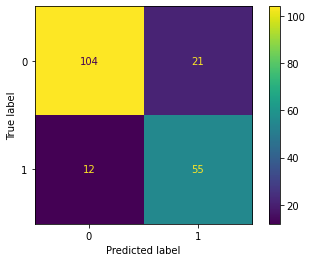

In [44]:
cm = confusion_matrix(y_test, clf_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

plt.show()

In [45]:
#Importance of feature in the Decision Tree

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], clf.feature_importances_):
    print(name + ': ' + str(importance))

Glucose: 0.11160373640327387
BloodPressure: 0.0
SkinThickness: 0.07509200328978931
Insulin: 0.6145983414723694
BMI: 0.07822081989240524
DiabetesPedigreeFunction: 0.03321239008163629
Age: 0.0872727088605259


for this, we can see that some feature are not need: BloodPressure

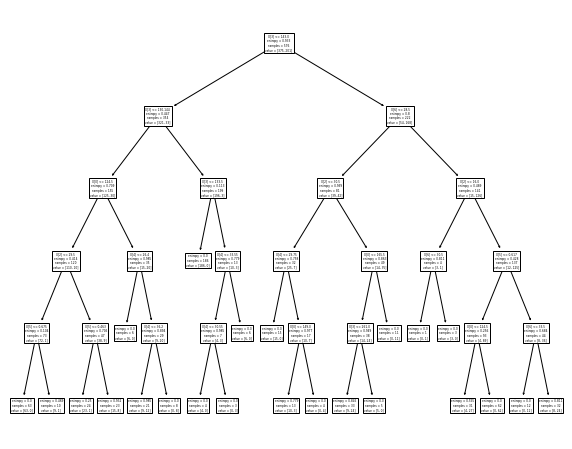

In [46]:
plt.figure(figsize=(10,8))
plot_tree(clf)
plt.show()

## Search change the depth of tree to obtain a better classification

In [42]:

accuracies = list()
nro_feature = X_train.columns.size
depth_range = range(1, nro_feature+1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    tree_model = DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             random_state=0)
    tree_model.fit(X_train, y_train)
    accuracies.append(tree_model.score(X_test, y_test))
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.822917
         2          0.822917
         3          0.859375
         4          0.864583
         5          0.869792
         6          0.864583
         7          0.859375


## Using GridSearchCV

In [77]:
max_features = range(1,X_train.columns.size+1)
criterion = ['gini', 'entropy']
max_depth = [2,3,4,5]
parameters = dict(max_features=max_features,
                      criterion=criterion,
                      max_depth=max_depth,
                      min_samples_split=[20,30],
                      min_samples_leaf=[5,10])

In [79]:
clf_GS = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters)
clf_GS.fit(X, y)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5], 'max_features': range(1, 8),
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [20, 30]})

In [80]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', clf_GS.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', clf_GS.best_estimator_.get_params()['min_samples_leaf'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['max_features'])
clf_GS.best_estimator_.get_params()

Best Criterion: entropy
Best max_depth: 4
Best min_samples_split: 20
Best min_samples_leaf: 10
Best Number Of Components: 6


{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 6,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 10,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [81]:
#Improve model of tree
tree_model = DecisionTreeClassifier(criterion='entropy',
                                    max_features=6,                                             
                                    min_samples_split=20,
                                    min_samples_leaf=10,
                                    max_depth = 4,
                                    random_state=0)
tree_model.fit(X_train, y_train)
print(f'Score:{tree_model.score(X_test, y_test)}')

# tree.feature_importances_ es un vector con la importancia estimada de cada atributo
for name, importance in zip(df_raw.columns[1:], tree_model.feature_importances_):
    print(name + ': ' + str(importance))

Score:0.8489583333333334
Glucose: 0.10205599508477263
BloodPressure: 0.0
SkinThickness: 0.06609411295517713
Insulin: 0.6958265089428735
BMI: 0.021665258561969037
DiabetesPedigreeFunction: 0.035394277514324717
Age: 0.078963846940883


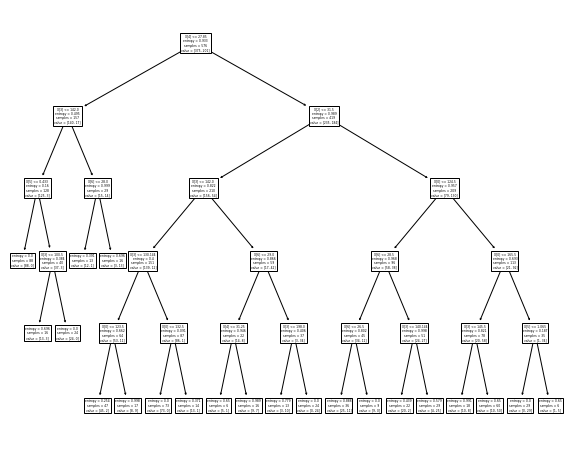

In [66]:
plt.figure(figsize=(10,8))
plot_tree(tree_model)
plt.show()